In [1]:
#importing modules- numpy and matplotlib.pyplot

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing tensorflow and printing version

import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
#Loading dataset-MNIST from keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(f'Training samples {len(x_train):,}')
print(f'Test samples {len(x_test):,}')

Training samples 60,000
Test samples 10,000


In [6]:
#defining a method show(.) 
def show(idx):
    print(y_train[idx])
    plt.imshow(x_train[idx])

8


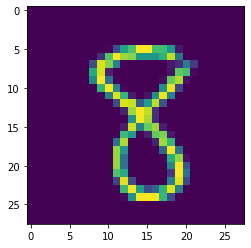

In [8]:
show(144)

1
Output : 1


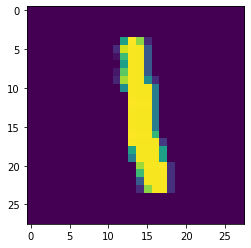

In [16]:
show(6)
print(f"Output : {y_train[6]}")

In [10]:
#Creating a model

np.random.seed(23)
tf.random.set_seed(23)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compiling the model

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0003),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
__________________________________________________

In [11]:
#Training the model for MNIST dataset(stored in x_train and y_train)

model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 3.6788 - accuracy: 0.2978
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6029 - accuracy: 0.4440
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1783 - accuracy: 0.6424
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9270 - accuracy: 0.7278
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7749 - accuracy: 0.7769
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6371 - accuracy: 0.8140
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5365 - accuracy: 0.8420
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4534 - accuracy: 0.8691
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3832 - accuracy: 0.8915
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.325

In [12]:
#Evaluating the model for test datasets

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1309 - accuracy: 0.9742


[0.1309332549571991, 0.9742000102996826]

In [13]:
#Save the model architecture

model.save('model.hdf5')